In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"E:\sem 2\Project\Banksim Dataset.csv")
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [4]:
data.describe()
#data symm or not?

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [5]:
#Checking for absurd values
data['step'].unique

<bound method Series.unique of 0           0
1           0
2           0
3           0
4           0
         ... 
594638    179
594639    179
594640    179
594641    179
594642    179
Name: step, Length: 594643, dtype: int64>

Text(0.5, 1.0, 'Fraud frequency')

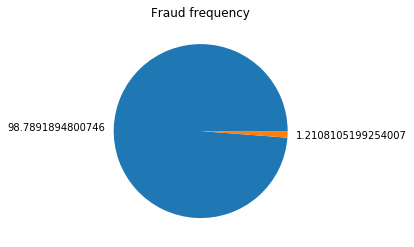

In [6]:
plt.pie(data["fraud"].value_counts(),labels=[587443*100/(587443+7200),7200*100/(587443+7200)])
plt.title("Fraud frequency")

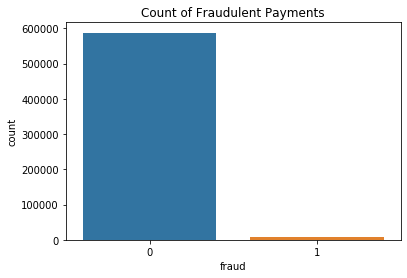

In [7]:
sns.countplot(x="fraud",data=data)
plt.title("Count of Fraudulent Payments")
plt.show()

In [8]:
#No. of transactons per category
data['category'].value_counts()

'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: category, dtype: int64

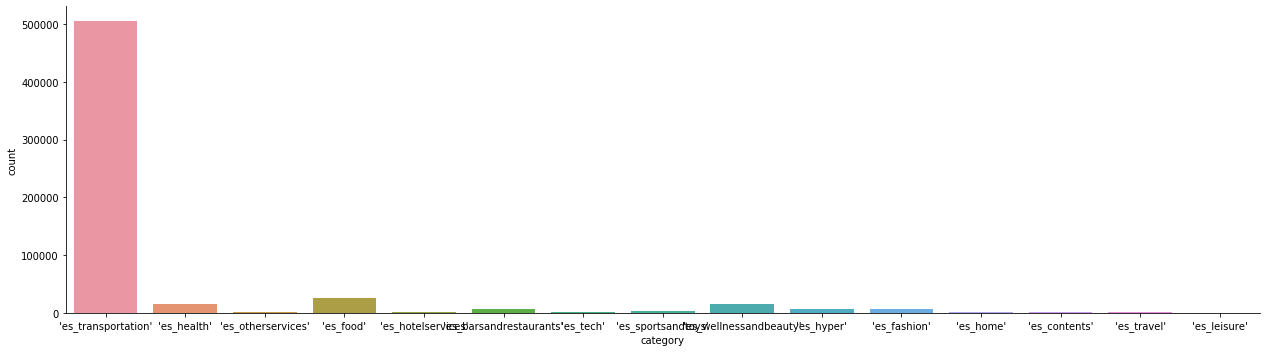

In [9]:
sns.catplot(data=data,x='category',kind='count',height=5,aspect=3.5)
#Maximum bank payment transactions are in transports

In [10]:
data['gender'].value_counts()

'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64

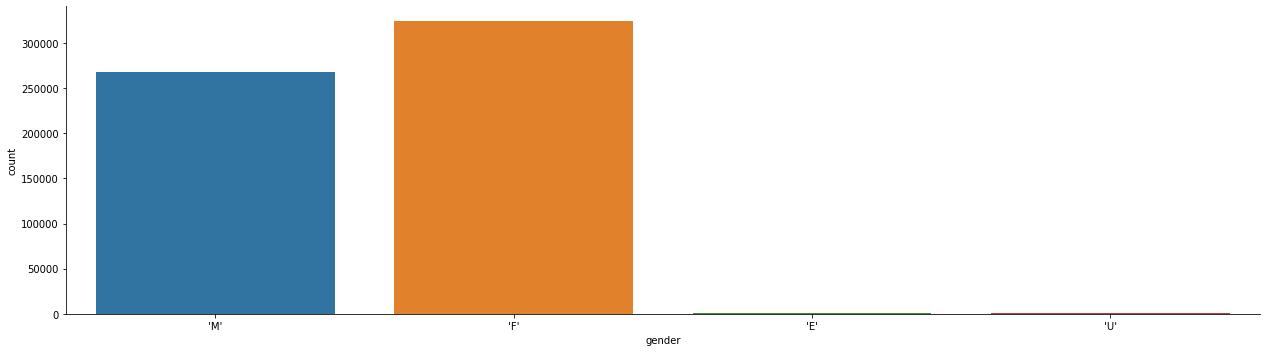

In [11]:
sns.catplot(data=data,x='gender',kind='count',height=5,aspect=3.5)

In [12]:
data['age'].value_counts()

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64

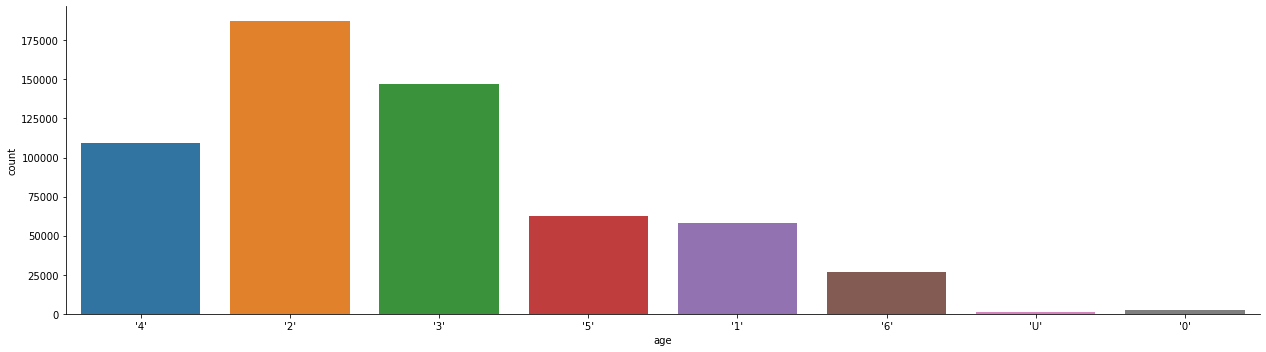

In [13]:
sns.catplot(data=data,x='age',kind='count',height=5,aspect=3.5)

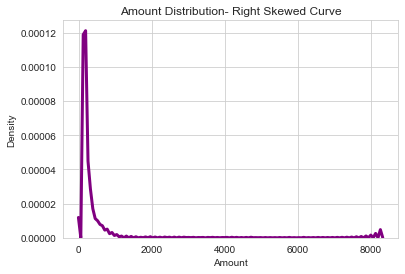

In [14]:
sns.set_style('whitegrid')
sns.distplot(data['amount'], hist=False, kde = True, color ='purple', kde_kws = {'linewidth': 3}, bins = 7)
plt.title("Amount Distribution- Right Skewed Curve")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.show()

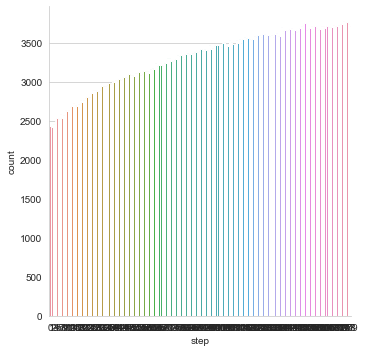

In [15]:
sns.catplot(data=data,x='step',kind='count') #there is no relationship between time and number of fraud cases

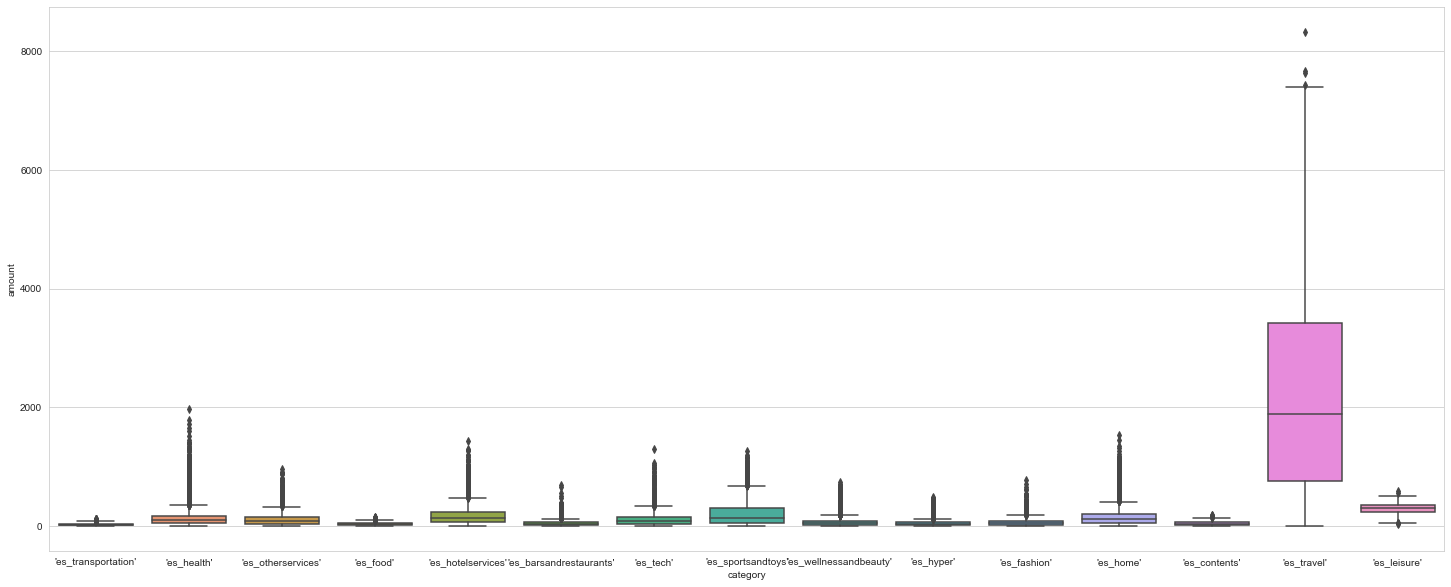

In [16]:
plt.subplots(figsize=(25,10))
sns.boxplot(x=data.category,y=data.amount,data=data)

In [17]:
data=data.drop(['zipcodeOri', 'zipMerchant'], axis = 1)

In [18]:
# Create two dataframes with fraud and non-fraud data 
data_fraud = data.loc[data.fraud == 1] 
data_nonfraud = data.loc[data.fraud == 0]

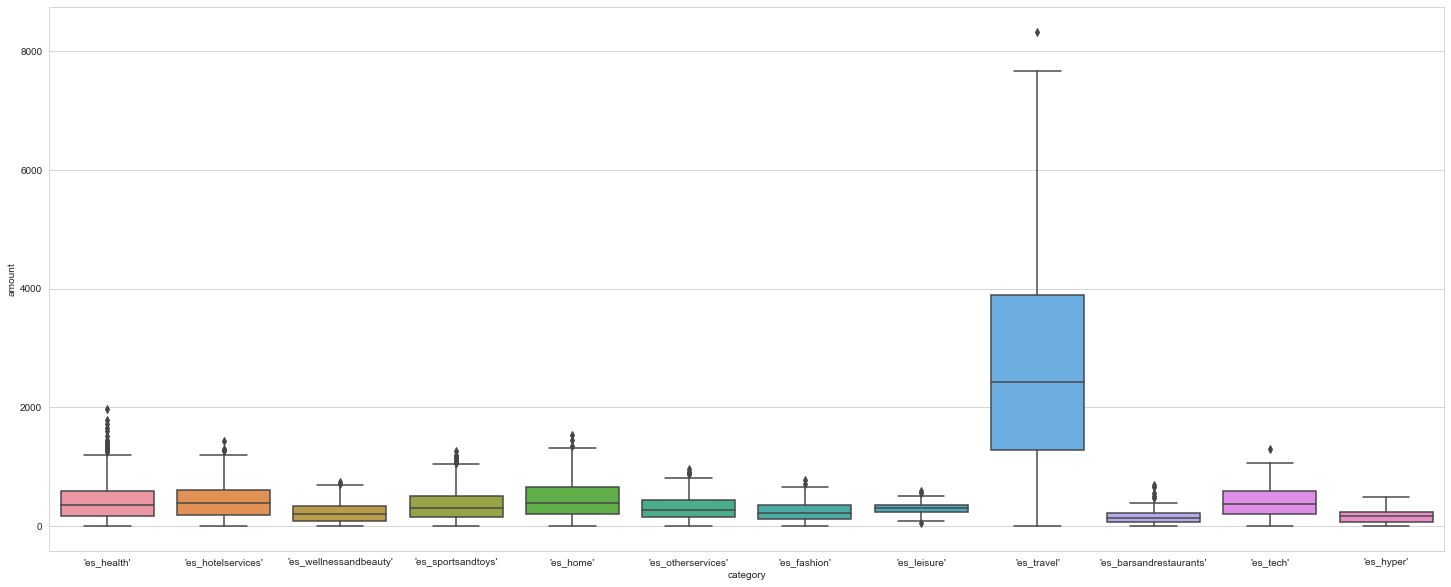

In [19]:
plt.subplots(figsize=(25,10))
sns.boxplot(x=data_fraud.category,y=data_fraud.amount)

In [20]:
data_fraud['category'].value_counts()

'es_sportsandtoys'         1982
'es_health'                1696
'es_wellnessandbeauty'      718
'es_travel'                 578
'es_hotelservices'          548
'es_leisure'                474
'es_home'                   302
'es_hyper'                  280
'es_otherservices'          228
'es_tech'                   158
'es_barsandrestaurants'     120
'es_fashion'                116
Name: category, dtype: int64

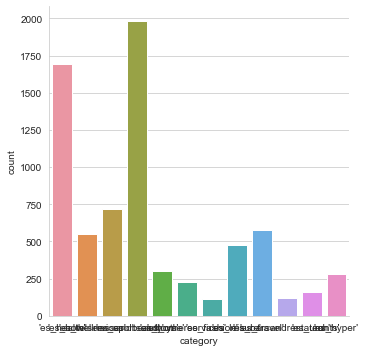

In [21]:
sns.catplot(data=data_fraud,x='category',kind='count')

In [22]:
data_nonfraud['category'].value_counts()

'es_transportation'        505119
'es_food'                   26254
'es_health'                 14437
'es_wellnessandbeauty'      14368
'es_fashion'                 6338
'es_barsandrestaurants'      6253
'es_hyper'                   5818
'es_tech'                    2212
'es_sportsandtoys'           2020
'es_home'                    1684
'es_hotelservices'           1196
'es_contents'                 885
'es_otherservices'            684
'es_travel'                   150
'es_leisure'                   25
Name: category, dtype: int64

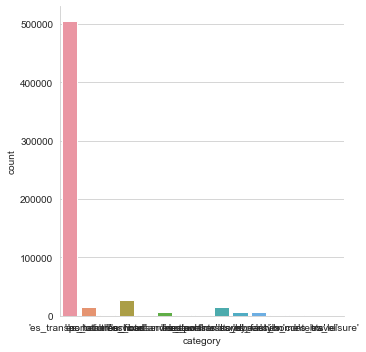

In [23]:
sns.catplot(data=data_nonfraud,x='category',kind='count')

In [24]:
data_fraud['gender'].value_counts()

'F'    4758
'M'    2435
'E'       7
Name: gender, dtype: int64

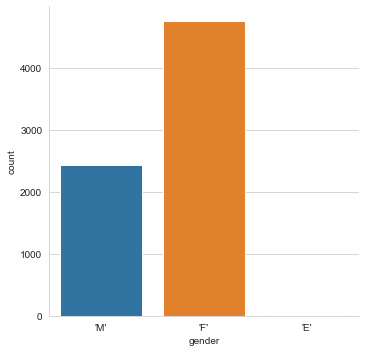

In [25]:
sns.catplot(data=data_fraud,x='gender',kind='count')

In [26]:
data_nonfraud['gender'].value_counts()

'F'    319807
'M'    265950
'E'      1171
'U'       515
Name: gender, dtype: int64

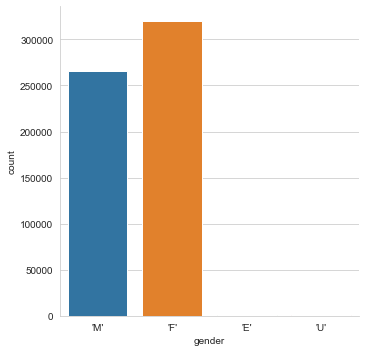

In [27]:
sns.catplot(data=data_nonfraud,x='gender',kind='count')

In [28]:
data_fraud['age'].value_counts()

'2'    2344
'3'    1755
'4'    1410
'1'     689
'5'     686
'6'     261
'0'      48
'U'       7
Name: age, dtype: int64

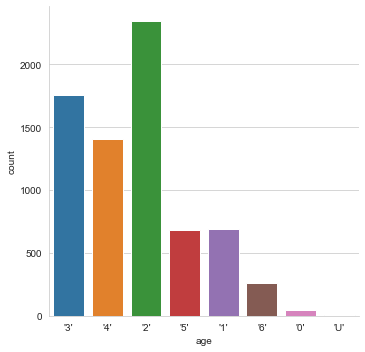

In [29]:
sns.catplot(data=data_fraud,x='age',kind='count')

In [30]:
data_nonfraud['age'].value_counts()

'2'    184966
'3'    145376
'4'    107615
'5'     61956
'1'     57442
'6'     26513
'0'      2404
'U'      1171
Name: age, dtype: int64

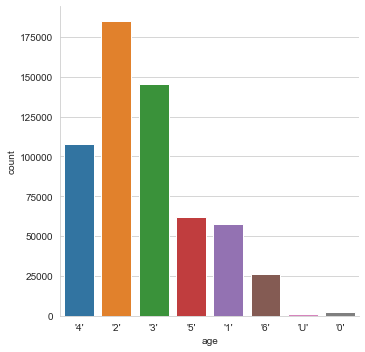

In [31]:
sns.catplot(data=data_nonfraud,x='age',kind='count')

In [32]:
data.groupby('category')['amount','fraud'].mean()

C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,amount,fraud
category,,
'es_barsandrestaurants',43.461014,0.018829
'es_contents',44.547571,0.000000
'es_fashion',65.666642,0.017973
'es_food',37.070405,0.000000
'es_health',135.621367,0.105126
'es_home',165.670846,0.152064
'es_hotelservices',205.614249,0.314220
'es_hyper',45.970421,0.045917
'es_leisure',288.911303,0.949900


In [33]:
data.groupby('gender')['amount','fraud'].mean()

C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,amount,fraud
gender,,
'E',36.627623,0.005942
'F',39.213044,0.014660
'M',36.308094,0.009073
'U',31.508932,0.000000


In [34]:
data.groupby('age')['amount','fraud'].mean()

C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,amount,fraud
age,,
'0',46.602896,0.019576
'1',37.530909,0.011853
'2',38.358458,0.012514
'3',37.879718,0.011928
'4',38.201522,0.012933
'5',36.426231,0.010951
'6',36.865624,0.009748
'U',36.627623,0.005942


C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


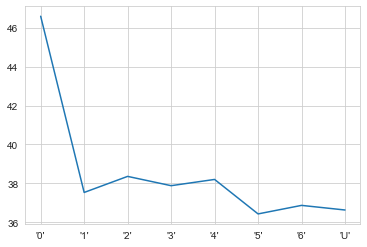

In [35]:
plt.plot(data.groupby('age')['amount','fraud'].mean()['amount'])


C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


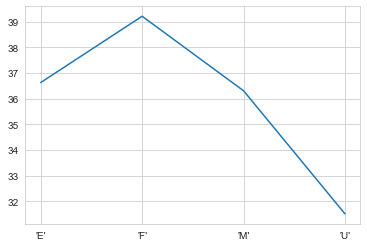

In [36]:
plt.plot(data.groupby('gender')['amount','fraud'].mean()['amount'])


C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


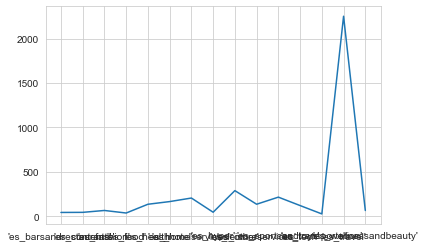

In [37]:
plt.plot(data.groupby('category')['amount','fraud'].mean()['amount'])

C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


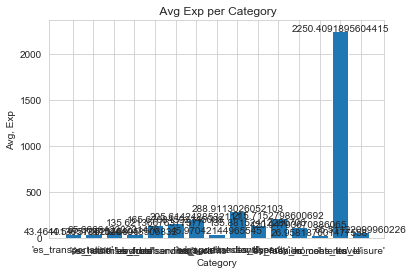

In [38]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
plt.bar(data.category.unique(),data.groupby('category')['amount','fraud'].mean()['amount'])
plt.title(" Avg Exp per Category")
plt.xlabel("Category")
plt.ylabel("Avg, Exp")
addlabels(data.category.unique(),data.groupby('category')['amount','fraud'].mean()['amount'] )
plt.show()


C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


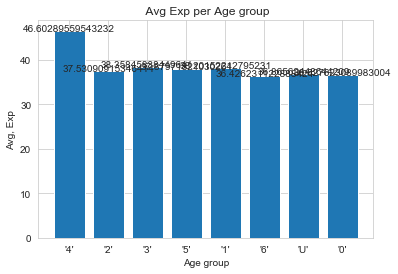

In [39]:
plt.bar(data.age.unique(),data.groupby('age')['amount','fraud'].mean()['amount'])
plt.title(" Avg Exp per Age group")
plt.xlabel("Age group")
plt.ylabel("Avg, Exp")
addlabels(data.age.unique(),data.groupby('age')['amount','fraud'].mean()['amount'] )
plt.show()

C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


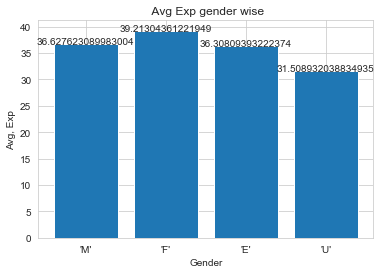

In [40]:
plt.bar(data.gender.unique(),data.groupby('gender')['amount','fraud'].mean()['amount'])
plt.title(" Avg Exp gender wise")
plt.xlabel("Gender")
plt.ylabel("Avg, Exp")
addlabels(data.gender.unique(),data.groupby('gender')['amount','fraud'].mean()['amount'] )
plt.show()

In [41]:
def interval(x):
    if x<500:
        return "0-500"
    if x<1000:
        return "500-1000"
    if x<1500:
        return "1000-1500"
    if x<2000:
        return "1500-2000"
    if x<2500:
        return "2000-2500"
    if x<3000:
        return "2500-3000"
    if x>=3000:
        return ">=3000"
data["amt_interval"] = data["amount"].apply(lambda x: interval(x))
    

In [42]:
df=data.groupby('amt_interval')['amount','fraud'].mean()
df["fraud"]=df["fraud"]*100
df["nonfraud"]=100-df["fraud"]
df.sort_values(by=['amount'], inplace=True)
df

C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,amount,fraud,nonfraud
amt_interval,,,
0-500,33.422073,0.864841,99.135159
500-1000,679.148657,96.264744,3.735256
1000-1500,1171.380421,90.654206,9.345794
1500-2000,1764.578750,87.500000,12.500000
2000-2500,2252.306875,98.437500,1.562500
2500-3000,2770.648276,100.000000,0.000000
>=3000,4487.204820,100.000000,0.000000


In [43]:
data["amt_interval"].value_counts()

0-500        592479
500-1000       1526
>=3000          222
1000-1500       214
1500-2000        80
2000-2500        64
2500-3000        58
Name: amt_interval, dtype: int64

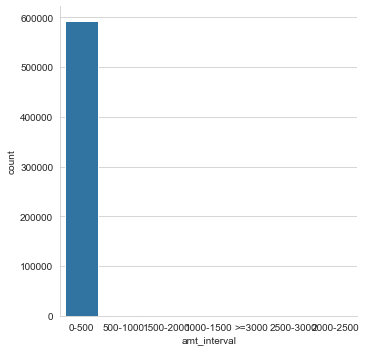

In [44]:
sns.catplot(data=data,x='amt_interval',kind='count')

Text(0.5, 1.0, 'Fraud % for amt_intervals')

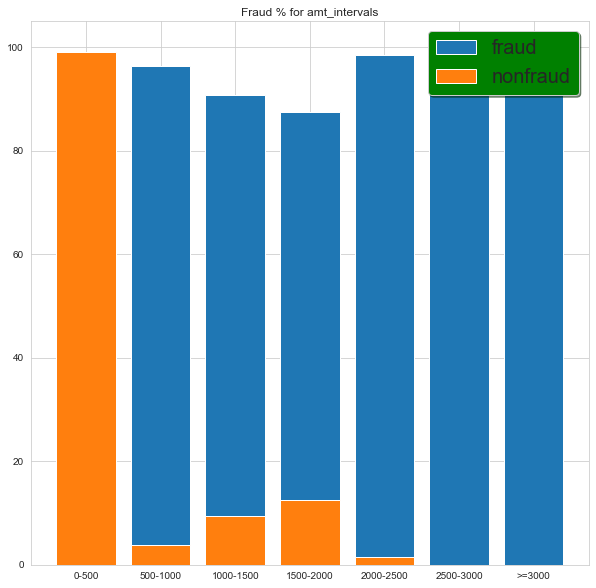

In [45]:
plt.figure(figsize=(10,10))
plt.bar(["0-500","500-1000","1000-1500","1500-2000","2000-2500","2500-3000",">=3000"],df["fraud"])
plt.bar(["0-500","500-1000","1000-1500","1500-2000","2000-2500","2500-3000",">=3000"],df["nonfraud"])
plt.legend(["fraud", "nonfraud"],loc='upper right', prop = {'size' : 20}, shadow = True, facecolor = 'green')
plt.title("Fraud % for amt_intervals")


In [46]:
def cat(x):
    if x<250:
        return "0-250"
    if x>=250:
        return ">=250"
data_fraud["cat"] = data_fraud["amount"].apply(lambda x: cat(x))
data_nonfraud["cat"] = data_nonfraud["amount"].apply(lambda x: cat(x))

C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [47]:
z=["0","1"]
data_nonfraud["cat"].value_counts()
data_fraud["cat"].value_counts()

>=250    4417
0-250    2783
Name: cat, dtype: int64

Text(0.5, 1.0, 'transaction category for amt range 0-250')

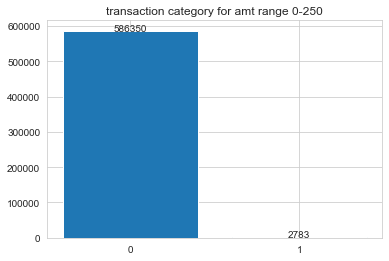

In [48]:
plt.bar(z,[data_nonfraud["cat"].value_counts()["0-250"],data_fraud["cat"].value_counts()["0-250"]])
addlabels(z,[data_nonfraud["cat"].value_counts()["0-250"],data_fraud["cat"].value_counts()["0-250"]])
plt.title("transaction category for amt range 0-250")

Text(0.5, 1.0, 'transaction category for amt range >=250')

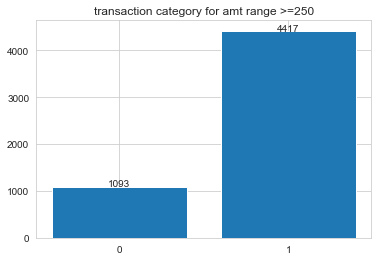

In [49]:
plt.bar(z,[data_nonfraud["cat"].value_counts()[">=250"],data_fraud["cat"].value_counts()[">=250"]])
addlabels(z,[data_nonfraud["cat"].value_counts()[">=250"],data_fraud["cat"].value_counts()[">=250"]])
plt.title("transaction category for amt range >=250")

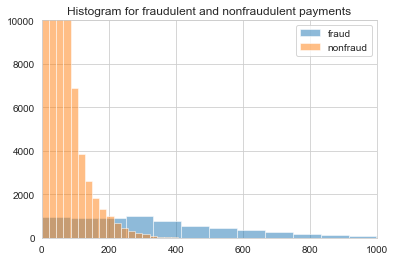

In [50]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(data_fraud.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(data_nonfraud.amount, alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram for fraudulent and nonfraudulent payments")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

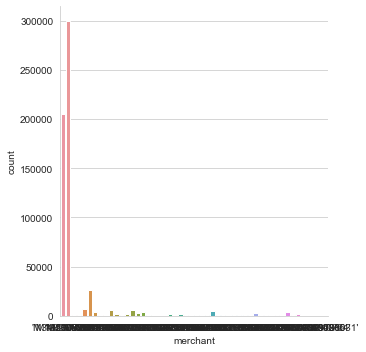

In [51]:
sns.catplot(data=data,x='merchant',kind='count',orient="v")

In [52]:
#Data Processing
#In this part we will preprocess the data and prepare for the training.

# turning object columns type to categorical for easing the transformation process
col_categorical = data.select_dtypes(include= ['object']).columns
#select_dtypes() function return a subset of the DataFrame's columns based on the column dtypes. 
#The parameters of this function can be set to include all the columns having some specific data type or it could be set 
#to exclude all those columns which has some specific data types.
for col in col_categorical:
    data[col] = data[col].astype('category')
#astype() method is used to cast a pandas object to a specified dtype. astype() function also provides the capability to
#convert any suitable existing column to categorical type. DataFrame. astype() function comes very handy when we want to
#case a particular column data type to another data type    
# categorical values ==> numeric values
data[col_categorical] = data[col_categorical].apply(lambda x: x.cat.codes)
#The categorical type is a process of factorization. Meaning that each unique value or category is given a incremented 
#integer value starting from zero.
data.head()




,step,customer,age,gender,merchant,category,amount,fraud,amt_interval
0,0,210,4,2,30,12,4.55,0,0
1,0,2753,2,2,30,12,39.68,0,0
2,0,2285,4,1,18,12,26.89,0,0
3,0,1650,3,2,30,12,17.25,0,0
4,0,3585,5,2,30,12,35.72,0,0


In [53]:
#Let's define our independent variable (X) and dependant/target variable y

In [54]:
X = data.drop(['fraud'],axis=1)
y = data['fraud']
print('X =\n', X.head(),"\n")
print('Y =\n', y.head(),'\n')

X =
    step  customer  age  gender  merchant  category  amount  amt_interval
0     0       210    4       2        30        12    4.55             0
1     0      2753    2       2        30        12   39.68             0
2     0      2285    4       1        18        12   26.89             0
3     0      1650    3       2        30        12   17.25             0
4     0      3585    5       2        30        12   35.72             0 

Y =
 0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64 



In [55]:
y[y==1].count() #No. of frauds

7200

In [56]:
#Oversampling with SMOTE
#Using SMOTE(Synthetic Minority Oversampling Technique) for balancing the dataset. 
#Resulted counts show that now we have exact number of class instances (1 and 0).





In [57]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
Note: you may need to restart the kernel to use updated packages.


In [62]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=21)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X,y)
from collections import Counter
print("Before SMOTE :",Counter(y))
print("After SMOTE :",Counter(y_res))
print("\nThis shows that before smoting there was huge difference in number of frauds and non frauds. But after smoting both are equal")
#y_res = pd.DataFrame(y_res)
#print(y_res[0].value_counts())

Before SMOTE : Counter({0: 587443, 1: 7200})
After SMOTE : Counter({0: 587443, 1: 587443})

This shows that before smoting there was huge difference in number of frauds and non frauds. But after smoting both are equal
